# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
import os

practice_dir_path = 'C:/Users/zhjck/TimeSeriesLabs/practice/05 Snippets/'
os.chdir(practice_dir_path)

In [3]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

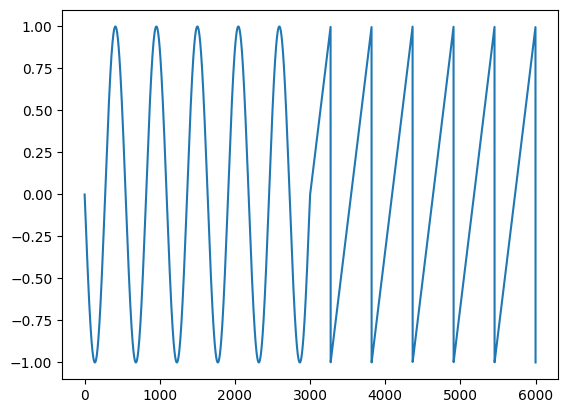

In [8]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [10]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


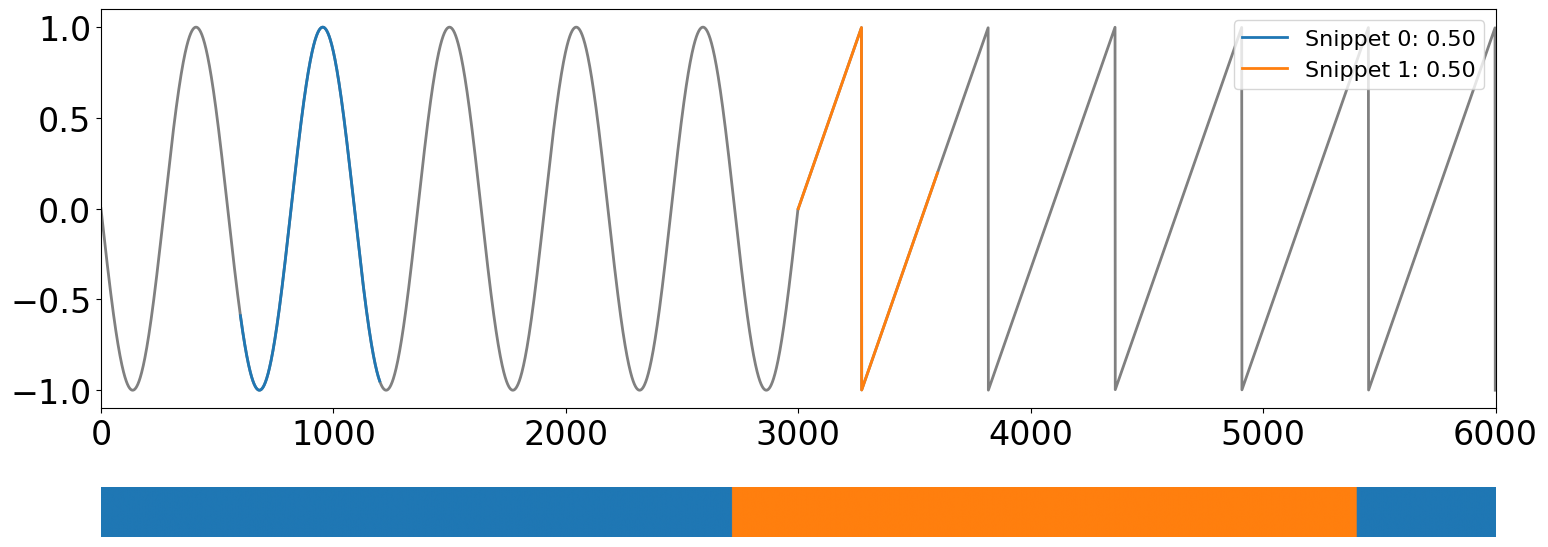

<Axes: >

In [12]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [22]:
print(time.min(), time.max())
print(time[:10])


nan nan
[ 5.05710e+02  2.00000e+00          nan  3.50625e+01  4.97271e-01
  9.08249e+00 -1.87554e+00  3.19610e-01  9.10631e+00 -1.64252e+00]


In [24]:
import pandas as pd
import numpy as np

data_path = "./datasets/PAMAP/PAMAP.txt"

df = pd.read_csv(
    data_path,
    sep=r"\s+",       
    header=None,
    engine="python"
)

print(df.head())
print(df.shape)


       0           1           2          3          4          5       \
0  505.710000  505.720000  505.730000  505.74000  505.75000  505.76000   
1    2.000000    2.000000    2.000000    2.00000    2.00000    2.00000   
2         NaN         NaN   79.000000        NaN        NaN        NaN   
3   35.062500   35.062500   35.062500   35.06250   35.06250   35.06250   
4    0.497271    0.693164    0.929013    1.03968    1.07093    1.17319   

       6           7          8           9       ...      145990      145991  \
0  505.770000  505.780000  505.79000  505.800000  ...  2305.61000  2305.62000   
1    2.000000    2.000000    2.00000    2.000000  ...     4.00000     4.00000   
2         NaN         NaN        NaN         NaN  ...   110.00000         NaN   
3   35.062500   35.062500   35.06250   35.062500  ...    35.68750    35.68750   
4    0.981674    0.867429    0.82464    0.903157  ...     1.46933     1.74399   

       145992      145993      145994      145995      145996      1

In [45]:
time = df.iloc[:, 0].values
gyro_y = df.iloc[:, 7].values
mask_valid = ~np.isnan(time) & ~np.isnan(gyro_y)

time = df.iloc[0, :].values      # строка времени
gyro_y = df.iloc[7, :].values   # строка gyro Y

print(time[:10])
print(gyro_y[:10])
print("NaNs in gyro_y:", np.isnan(gyro_y).sum())


t_start = 1790
t_end = 1930

mask_time = (time >= t_start) & (time <= t_end)

time_seg = time[mask_time]
gyro_seg = gyro_y[mask_time]

print("Segment length before NaN removal:", len(gyro_seg))

mask_valid = ~np.isnan(gyro_seg)
ts = gyro_seg[mask_valid]

print("Final length:", len(ts))
print("NaNs remaining:", np.isnan(ts).sum())




[505.71 505.72 505.73 505.74 505.75 505.76 505.77 505.78 505.79 505.8 ]
[0.31961  0.379878 0.606483 0.772609 0.938327 0.998138 0.936646 0.7858
 0.724813 0.665787]
NaNs in gyro_y: 86
Segment length before NaN removal: 13430
Final length: 13430
NaNs remaining: 0


100


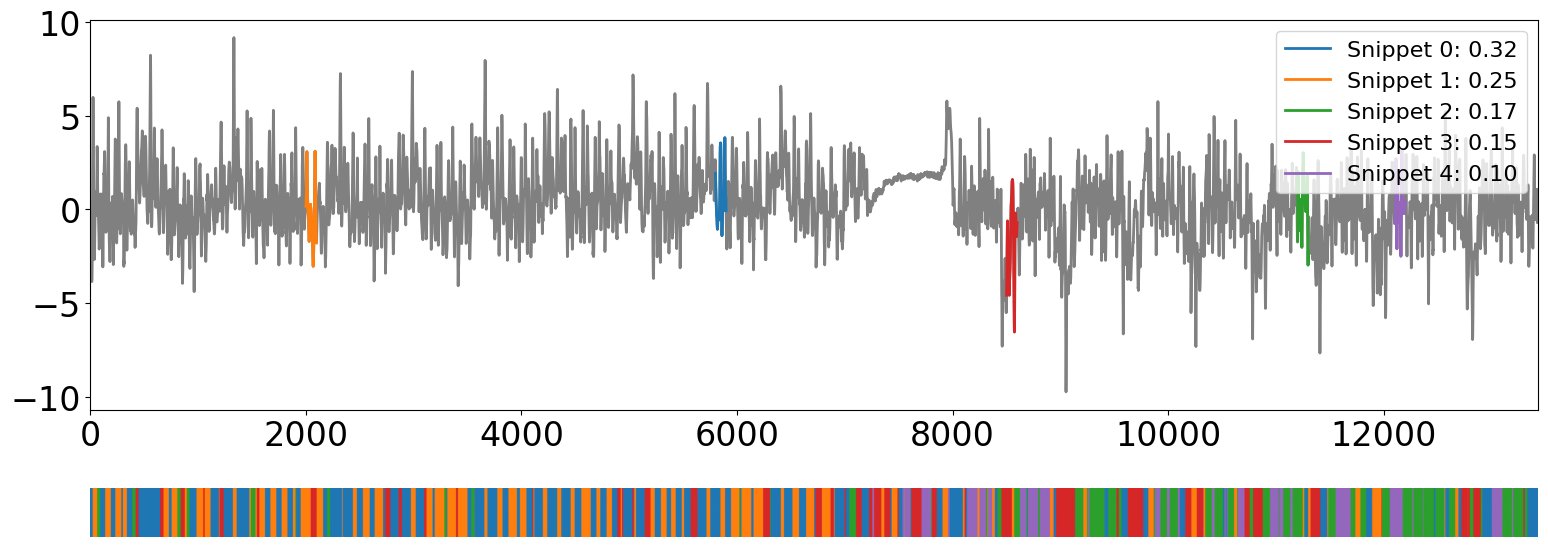

<Axes: >

In [61]:
from stumpy import snippets

k = 5
m = 100
assert len(ts) > 2 * m, "Time series too short for chosen m"
snp = snippets(ts, m, k, percentage=0.5)
plot_snippets(ts, snp)


Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [70]:
activity = df.iloc[1, :].values   # строка activity_id
activity_seg = activity[mask_time]
activity_seg = activity_seg[mask_valid]

snippet_labels = np.zeros(len(ts), dtype=int)

for regime in snp[5]:   # (snippet_id, start, end)
    snippet_labels[regime[1]:regime[2]] = regime[0]


In [72]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

cm = confusion_matrix(activity_seg, snippet_labels)

row_ind, col_ind = linear_sum_assignment(-cm)
accuracy = cm[row_ind, col_ind].sum() / cm.sum()

print("Accuracy (best label matching):", accuracy)


Accuracy (best label matching): 0.4114668652271035


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Полученная точность разметки, равная 0.41, превышает случайный уровень и свидетельствует о том, что сниппеты отражают характерные режимы движения. Однако полное совпадение с семантическими активностями не достигается, поскольку алгоритм SnippetFinder является ненадзорным и оптимизирует сходство динамики сигнала, а не классификационную точность.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [77]:
time = df.iloc[0, :].values

gyro_x = df.iloc[6, :].values
gyro_y = df.iloc[7, :].values
gyro_z = df.iloc[8, :].values



t_start = 1790
t_end = 1930

mask_time = (time >= t_start) & (time <= t_end)

gx = gyro_x[mask_time]
gy = gyro_y[mask_time]
gz = gyro_z[mask_time]




mask_valid = ~np.isnan(gx) & ~np.isnan(gy) & ~np.isnan(gz)

gx = gx[mask_valid]
gy = gy[mask_valid]
gz = gz[mask_valid]



from stumpy import snippets

m = 100
k = 5

snp_x = snippets(gx, m, k, percentage=0.5)
snp_y = snippets(gy, m, k, percentage=0.5)
snp_z = snippets(gz, m, k, percentage=0.5)


In [79]:
def get_snippet_labels(ts, snp):
    labels = np.zeros(len(ts), dtype=int)
    for regime in snp[5]:  # (snippet_id, start, end)
        labels[regime[1]:regime[2]] = regime[0]
    return labels


In [81]:
labels_x = get_snippet_labels(gx, snp_x)
labels_y = get_snippet_labels(gy, snp_y)
labels_z = get_snippet_labels(gz, snp_z)


In [87]:
from scipy.stats import mode

labels_stack = np.vstack([labels_x, labels_y, labels_z])

final_labels, _ = mode(labels_stack, axis=0)
final_labels = final_labels.flatten()




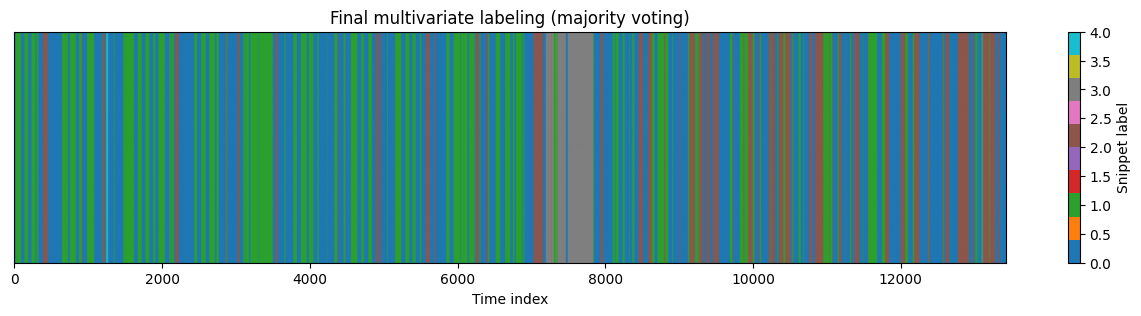

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 3))
plt.imshow(final_labels.reshape(1, -1), aspect="auto", cmap="tab10")
plt.yticks([])
plt.xlabel("Time index")
plt.title("Final multivariate labeling (majority voting)")
plt.colorbar(label="Snippet label")
plt.show()


Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [91]:
activity = df.iloc[1, :].values
activity_seg = activity[mask_time]        # временной интервал 1790-1930
activity_seg = activity_seg[mask_valid] 


In [97]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import numpy as np

cm = confusion_matrix(activity_seg, final_labels)
row_ind, col_ind = linear_sum_assignment(-cm)  # максимизируем совпадение
accuracy = cm[row_ind, col_ind].sum() / cm.sum()

print("Multivariate labeling accuracy (best label matching):", accuracy)

from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(activity_seg, final_labels)
print("Adjusted Rand Index (ARI):", ari)

from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(activity_seg, final_labels)
print("Normalized Mutual Information (NMI):", nmi)


Multivariate labeling accuracy (best label matching): 0.42129560685033507
Adjusted Rand Index (ARI): 0.0471238517775031
Normalized Mutual Information (NMI): 0.053575329956956665


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Итоговая многомерная разметка (голосование по трём осям гироскопа) показала accuracy ≈ 0.42 и очень низкие значения ARI/NMI. Это согласуется с природой алгоритма SnippetFinder: он выявляет характерные режимы временного ряда, но не обеспечивает точное совпадение с семантическими активностями. Таким образом, сниппеты дают полезную информацию о структуре движений, но не могут использоваться для прямой классификации активности.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

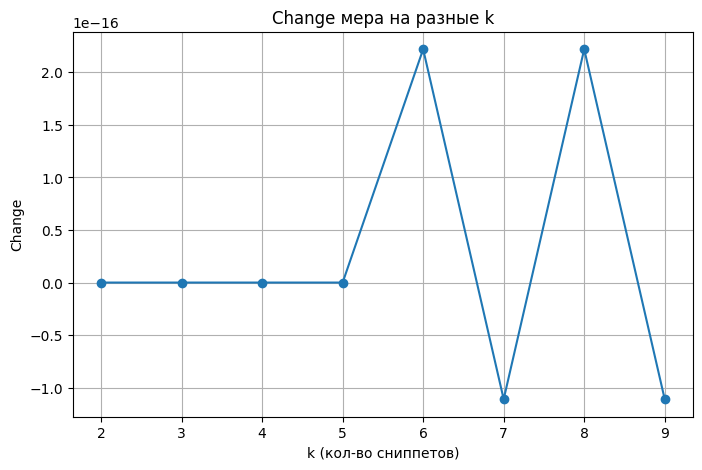

In [103]:
import numpy as np
from stumpy import snippets
import matplotlib.pyplot as plt

ts = gy  

# Параметры
m = 100
k_values = range(1, 10)  # 1 ≤ k ≤ 9

profile_areas = []

# Вычисление ProfileArea для каждого k
for k in k_values:
    snp = snippets(ts, m, k, percentage=0.5)
    
    # В stumpy score находится в snp[3] — массив длиной k
    scores = snp[3]  
    profile_area = np.sum(scores)
    profile_areas.append(profile_area)

# Вычисление меры change
change = []
for i in range(1, len(profile_areas)):
    c = profile_areas[i-1] / profile_areas[i] - 1
    change.append(c)

# График
plt.figure(figsize=(8,5))
plt.plot(k_values[1:], change, marker='o')
plt.xlabel("k (кол-во сниппетов)")
plt.ylabel("Change")
plt.title("Change мера на разные k")
plt.grid(True)
plt.show()


In [107]:
for i, c in enumerate(change):
    print(f"k = {i+1} -> {i+2}, change = {c:.12f}")


k = 1 -> 2, change = 0.000000000000
k = 2 -> 3, change = 0.000000000000
k = 3 -> 4, change = 0.000000000000
k = 4 -> 5, change = 0.000000000000
k = 5 -> 6, change = 0.000000000000
k = 6 -> 7, change = -0.000000000000
k = 7 -> 8, change = 0.000000000000
k = 8 -> 9, change = -0.000000000000


Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?


Такие маленькие значения change не дают практического сигнала о том, какой k выбрать.

Причина: массив ts слишком маленький / слишком гладкий / score почти одинаковый.

Для реального подбора k лучше использовать:
Более длинный временной ряд
Более разнообразный сигнал (чтобы добавление нового сниппета реально уменьшало MPdist)